# 지도학습 분류 Overview

https://scikit-learn.org/stable/api/index.html

주어진 입력 데이터와 그에 대응하는 정답(label)을 기반으로 모델을 학습하는 방식
- 분류 : 이진분류, 다중분류
- 회귀 : 연속값을 예측

## 환경설정

In [ ]:
# !conda install scikit-learn -y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 한글 폰트 사용 설정

import matplotlib.font_manager as fm


font_Path = 'C:\\Windows\\Fonts\\gulim.ttc'
font= fm.FontProperties(fname =font_Path).get_name()
plt.rc('font', family = font)

## 생선 이진분류 - 도미냐? 방어냐?
이진 분류는 항상 1,0으로 구분한다.
- 도미냐(1)? 도미가 아니냐(0)?


In [5]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

print(len(bream_length), len( bream_weight))

35 35


In [16]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print(len(smelt_length), len( smelt_weight))

14 14


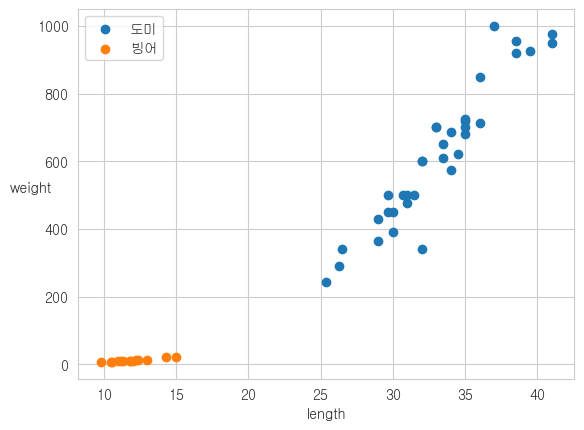

In [17]:
# 데이터 분포 확인 (산점도)
plt.scatter(x=bream_length,y=bream_weight, label='도미')
plt.scatter(x=smelt_length,y=smelt_weight, label='빙어')

plt.xlabel('length')
plt.ylabel('weight', rotation=0)
plt.legend()
plt.show()


### 데이터 전처리
모델이 원하는 형태로 가공
- 입력 : [길이, 무게]로 짝지어진 2차원 배열
- 정답 : 1, 0으로 구성된 1차원 배열

In [23]:
fish_length = bream_length + smelt_length # lst의 더하기는 서로 연결됨
fish_weight = bream_weight + smelt_weight
len(fish_length), len(fish_weight)

# 훈련 입력 데이터
train_input = []
for l, w in zip(fish_length, fish_weight):
    train_input.append([l, w])
# train_input

# 훈련 정답 데이터
train_label = [1]*len(bream_length) + [0]* len(smelt_length) # 도미는 1, 빙어는 0
train_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### K-최근접 이웃 분류모델

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
KN = KNeighborsClassifier()

# fit(훈련) - score(평가) - predict(예측)
# 최근접 이웃 모델의 훈련은 별도의 연산없이 모델이 데이터를 로드하면 끝이다.
KN.fit(train_input, train_label) # 입력 데이터, 정답 데이터

KN.score(train_input, train_label) # 실행 시 1이 나오는데 이는 정답률이 100이라는 뜻이다.

1.0

In [47]:
# 예측
KN.predict([[30, 500], [10,5], [20,120]]) # - 도미, 빙어, 배치-batch 차원으로 데이터 감싸서 전달

array([1, 0, 0])

In [39]:
# 최근접 이웃모델의 작동원리
# - 주어진 데이터와 가장 가까운 k개의 이웃을 찾고, 이웃 데이터를 이용해 예측
# - distance는 모델 데이터포인트와 거리 (유클리드 거리 측정방식)
# - index 모델 데이터포인트의 인덱스

distances, index = KN.kneighbors([[10,5]])
distances, index

# fancy indexing을 사용하기 위해 ndarray로 변환
np.array(train_input)[index]
# np.array(train_label)[index]

array([[[ 9.8,  6.7],
        [10.6,  7. ],
        [10.5,  7.5],
        [11.3,  8.7],
        [11. ,  9.7]]])

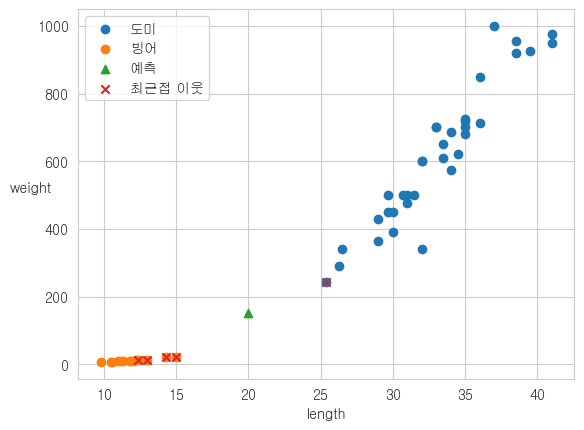

In [52]:
# 데이터 분포 확인
distances, index = KN.kneighbors([[20,150]])
train_input = np.array(train_input)

plt.scatter(x=bream_length,y=bream_weight, label='도미')
plt.scatter(x=smelt_length,y=smelt_weight, label='빙어')
plt.scatter(20,150, label='예측', marker='^')
plt.scatter(train_input[index, 0], train_input[index, 1], label = '최근접 이웃', marker='x')

plt.xlabel('length')
plt.ylabel('weight', rotation=0)
plt.legend()
plt.show()

In [53]:
# K개수를 변경 - 홀수개
KN49 = KNeighborsClassifier(n_neighbors=49)

# 훈련
KN49.fit(train_input, train_label)

# 평가
KN49.score(train_input, train_label) # 결과 값은 전체에서 도미가 차지하는 비율 35/49 도미는 true가 나오고, 빙어는 반드시 False가 나옴
# 도미는 이미 과반수이기 때문에. 즉, 최소 모집단 이하의 숫자를 K로 지정해야 한다는 결론이 생긴다. 최대한 절반 이하


0.7142857142857143

### 훈련 데이터와 테스트 데이터를 분리
- 훈련 데이터 : 모의고사
- 테스트 데이터 : 수능



In [55]:
# 훈련 입력 데이터
fish_input= []
for l, w in zip(fish_length, fish_weight):
    fish_input.append([l, w])

# 훈련 정답 데이터
fish_label = [1]*len(bream_length) + [0]* len(smelt_length)

In [56]:
# sampling 편향
# - 데이터가 한쪽으로 치우친 현상을 가리킨다. 훈련 데이터와 테스트 데이터는 구분되어야 한다.
# - 도미데이터를 훈련하고, 빙어로 테스트한다.

train_input = fish_input[:35]
train_label = fish_label[:35] # 모두 1

test_input = fish_input[35:]
test_label = fish_label[35:] # 모두 0

# 훈련
KN = KNeighborsClassifier(n_neighbors = 5)
KN.fit(train_input, train_label)
KN.score(test_input, test_label)




# 평가

0.0

In [64]:
# 훈련/테스트 데이터 나누기 함수

from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42) # test_size 기본값은 0.25로 test 부분을 뒤쪽 25%로 잡는 것, # stratify는 똑같이 비율을 맞춰서(???), # random_state는 같은 기준을 가지는 기준 지정-

train_input, test_input, train_label, test_label

sum(train_label), sum(test_label)


(24, 11)

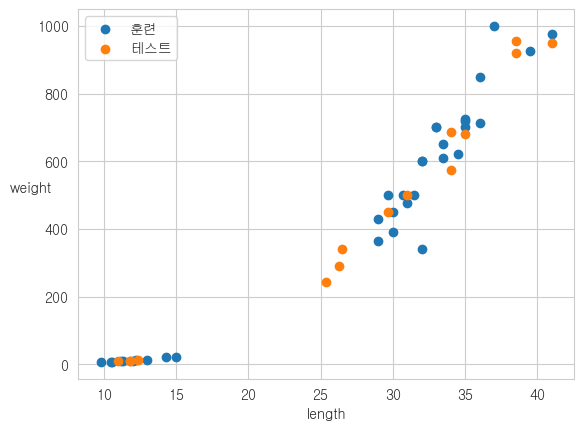

In [65]:
train_input = np.array(train_input)
test_input = np.array(test_input)

plt.scatter(train_input[:, 0], train_input[:, 1], label = '훈련')
plt.scatter(test_input[:, 0], test_input[:, 1], label = '테스트')

plt.xlabel('length')
plt.ylabel('weight', rotation=0)
plt.legend()
plt.show()

In [70]:
# 훈련
KN.fit(train_input, train_label)


# 평가
KN.score(test_input, test_label)


1.0

In [71]:
# 도미, 빙어 예측
KN = KNeighborsClassifier()

KN.fit(train_input, train_label)
KN.score(test_input, test_label)

x = [25,100] # 특정 개체 데이터
KN.predict([x])

array([0])

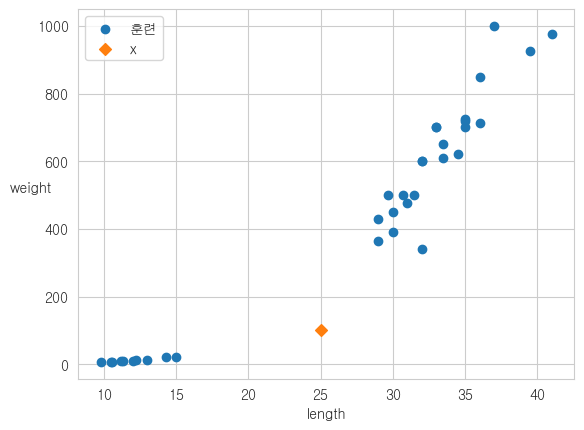

In [74]:
plt.scatter(train_input[:, 0], train_input[:, 1], label = '훈련')
plt.scatter(x[0], x[1], label = 'x', marker='D')

plt.xlabel('length')
plt.ylabel('weight', rotation=0)
# plt.xlim(0,1000) 축들의 스케일이 달라서 보정 필요하다면.
plt.legend()
plt.show()

In [75]:
distances, index = KN.kneighbors([x])
np.array(train_label)[index]

array([[0, 0, 0, 0, 0]])

### 표준점수
Z-score 평균에서 얼마나 떨어져 있는지를 표준편차단위로 계산한 값
(La-Tex)
$$
    표준점수 = \frac{데이터포인트 - 평균}{표준편차}
$$


In [78]:
mean = np.mean(train_input, axis=0)

std = np.std(train_input, axis=0)
mean, std

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [92]:
train_scaled = (train_input - mean) / std
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

In [79]:
# 훈련 데이터, 테스트 데이터, 예측 데이터 모두 동일한 방법으로 정규화를 해야 한다.
x_scaled = ([25,100]-mean)/std
x_scaled

array([-0.20071491, -1.08267792])

In [90]:
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.58938201, -1.36556271],
       [-1.51002961, -1.36493617],
       [ 1.13835694,  1.59579935],
       [ 0.79119016,  0.73430081],
       [ 0.69199966,  0.40536501],
       [-1.4505153 , -1.35397164],
       [-0.07176725, -0.48746075],
       [ 1.38633321,  1.58013574],
       [-0.16103871, -0.6378314 ],
       [ 0.69199966,  0.74996442],
       [ 0.39442813,  0.17041086],
       [ 1.13835694,  1.48615408],
       [ 0.26548048,  0.01377476],
       [-1.51002961, -1.3646229 ],
       [-0.05192915, -0.33082465]])

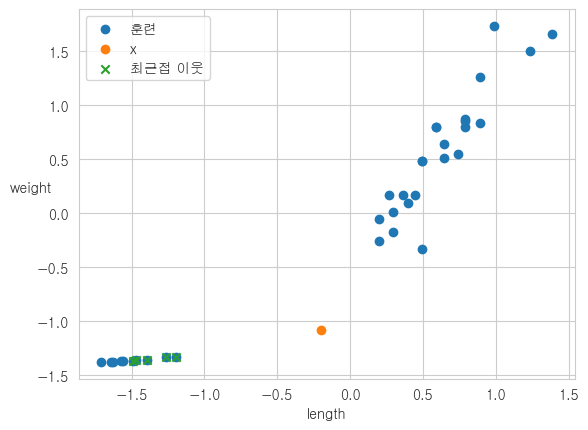

In [93]:
# 훈련
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label = '훈련')
plt.scatter(x_scaled[0], x_scaled[1], label = 'x', marker='o')
plt.scatter(train_scaled[index, 0], train_scaled[index, 1], label = '최근접 이웃', marker='x')

plt.xlabel('length')
plt.ylabel('weight', rotation=0)
plt.legend()
plt.show()

In [94]:
# standardScaler를 이용한 정규화

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(train_input) # 정규값 넣기

train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

In [99]:
# 이진분류 사용법 정리하기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0,
                33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0,
                41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0,
                600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0,
                1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = np.array([[l, w]for l, w in zip(length, weight)])
fish_target = np.array([1] * 35 + [0] * 14)

# train/test 데이터 분리

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size=0.3, stratify=fish_target, random_state=42)

# 데이터 정규화
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

# 모델 생성 및 훈련
KN = KNeighborsClassifier()
KN.fit(train_scaled, train_target)

# 평가
KN.score(train_scaled, train_target)

# 예측
pred = KN.predict(test_scaled[:5])

# 실제값, 예측값 순으로 전달
accuracy_score(test_target[:5], pred)


1.0